In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf, adfuller, kpss
register_matplotlib_converters()
from time import time


In [6]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')

In [ ]:
catfish_sales = pd.read_csv(r"C:\Users\21650\Downloads\catfish.csv",parse_dates=[0], index_col=0, date_parser=parser)["Total"]
#should become a series
type(catfish_sales)

C:\Users\21650\AppData\Local\Temp\ipykernel_10980\3098265176.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  catfish_sales = pd.read_csv(r"C:\Users\21650\Downloads\catfish.csv",parse_dates=[0], index_col=0, date_parser=parser)["Total"]


In [25]:
#infer the frequency of the data
catfish_sales = catfish_sales.asfreq(pd.infer_freq(catfish_sales.index))


In [27]:
datetime(2000,1,1)

datetime.datetime(2000, 1, 1, 0, 0)

In [28]:
start_date = datetime(2000,1,1)
end_date = datetime(2004,1,1)
lim_catfish_sales = catfish_sales[start_date:end_date]


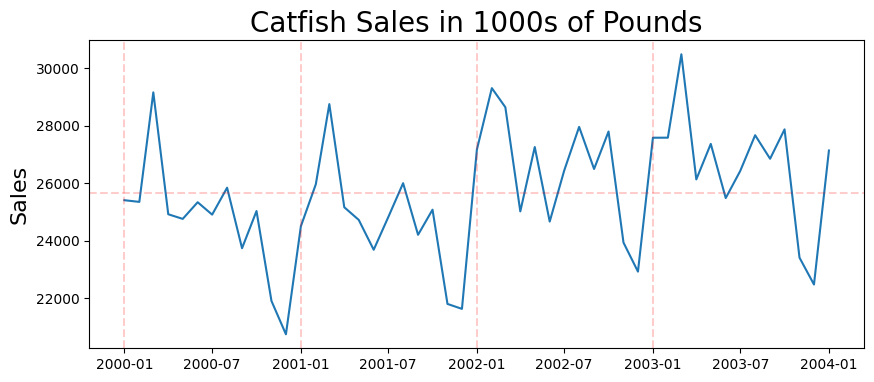

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(lim_catfish_sales)
plt.title('Catfish Sales in 1000s of Pounds', fontsize=20)
plt.ylabel('Sales', fontsize=16)
plt.axhline(lim_catfish_sales.mean(),alpha=0.2,linestyle="--",color="r")
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+"-01-01"),alpha=0.2,linestyle="--",color='r')
plt.show()

In [96]:
#adf test
result=adfuller(lim_catfish_sales)
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print("Critical Values:")
for key, value in result[4].items():
    print(f"   {key}: {value}")

#kpss test
result2=kpss(lim_catfish_sales)
print(f"KPSS Statistic: {result2[0]}")
print(f"p-value: {result2[1]}")
print("Critical Values:")
for key, value in result2[3].items():
    print(f"   {key}: {value}")

ADF Statistic: -0.45812915913513474
p-value: 0.8999315929015699
Critical Values:
   1%: -3.6209175221605827
   5%: -2.9435394610388332
   10%: -2.6104002410518627
KPSS Statistic: 0.3246679559644321
p-value: 0.1
Critical Values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739


C:\Users\21650\AppData\Local\Temp\ipykernel_10980\3036141108.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result2=kpss(lim_catfish_sales)


In [59]:
first_diff = lim_catfish_sales.diff()[1:]

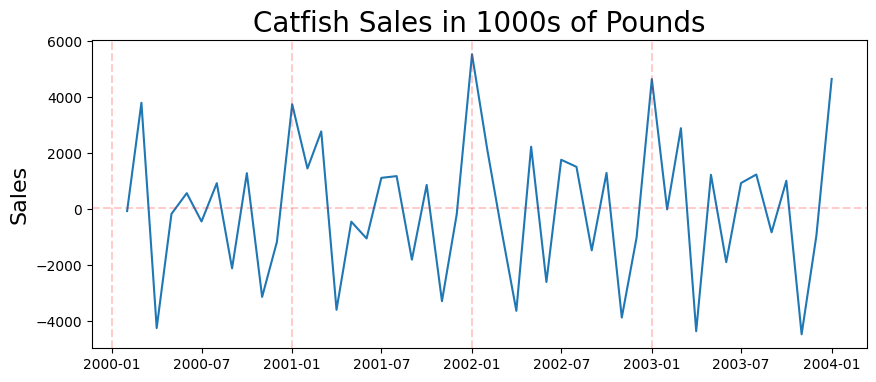

In [60]:
plt.figure(figsize=(10,4))
plt.plot(first_diff)
plt.title('Catfish Sales in 1000s of Pounds', fontsize=20)
plt.ylabel('Sales', fontsize=16)
plt.axhline(first_diff.mean(),alpha=0.2,linestyle="--",color="r")
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+"-01-01"),alpha=0.2,linestyle="--",color='r')
plt.show()

In [97]:
#adf test on differenced series
result=adfuller(first_diff)
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print("Critical Values:")
for key, value in result[4].items():
    print(f"   {key}: {value}")

#kpss test on differenced series
result2=kpss(first_diff)
print(f"KPSS Statistic: {result2[0]}")
print(f"p-value: {result2[1]}")
print("Critical Values:")
for key, value in result2[3].items():
    print(f"   {key}: {value}")

ADF Statistic: -8.052801250811907
p-value: 1.7239228907577138e-12
Critical Values:
   1%: -3.6209175221605827
   5%: -2.9435394610388332
   10%: -2.6104002410518627
KPSS Statistic: 0.07110908012641654
p-value: 0.1
Critical Values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739


C:\Users\21650\AppData\Local\Temp\ipykernel_10980\926954168.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result2=kpss(first_diff)


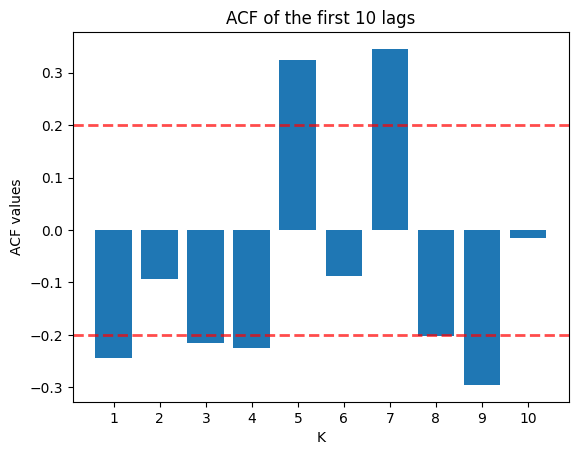

In [83]:
acf_vals = acf(first_diff)
num_lags=10
plt.bar(range(1,num_lags+1), acf_vals[1:num_lags+1])
plt.xticks(np.arange(1,11,1))
plt.axhline(.2,linestyle="--",color="r",alpha=.7,linewidth=2)
plt.axhline(-.2,linestyle="--",color="r",alpha=.7,linewidth=2)
plt.title(f"ACF of the first {num_lags} lags")
plt.xlabel("K")
plt.ylabel("ACF values")
plt.show()

Text(0, 0.5, 'PACF values')

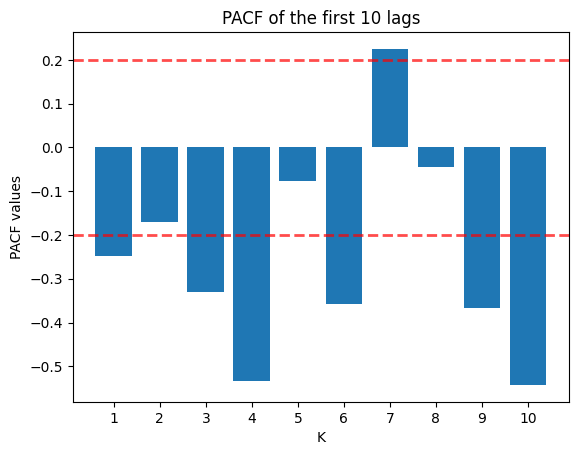

In [107]:
pacf_vals=pacf(first_diff)
plt.bar(range(1,num_lags+1),pacf_vals[1:num_lags+1])
plt.xticks(np.arange(1,11,1))
plt.axhline(.2,linestyle="--",color="r",alpha=.7,linewidth=2)
plt.axhline(-.2,linestyle="--",color="r",alpha=.7,linewidth=2)
plt.title(f"PACF of the first {num_lags} lags")
plt.xlabel("K")
plt.ylabel("PACF values")

In [124]:
#split train and test data
train_end = datetime(2003,7,1)
test_end = datetime(2004,1,1)

train_data = first_diff[:train_end]
test_data = first_diff[train_end + timedelta(days=1):test_end]

In [128]:
# define model
model = ARIMA(train_data, order=(4,0,1))

In [129]:
#fit the model
start = time()
model_fit = model.fit()
end = time()
print('Model Fitting Time:', end - start)

Model Fitting Time: 0.10233831405639648


In [130]:
#summary of the model
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  Total   No. Observations:                   42
Model:                 ARIMA(4, 0, 1)   Log Likelihood                -376.598
Date:                Fri, 02 May 2025   AIC                            767.195
Time:                        14:19:17   BIC                            779.359
Sample:                    02-01-2000   HQIC                           771.654
                         - 07-01-2003                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.1795    179.935      0.134      0.893    -328.487     376.846
ar.L1         -0.8659      0.222     -3.896      0.000      -1.302      -0.430
ar.L2         -0.4234      0.246     -1.724      0.0

In [114]:
#get prediction start and end dates
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

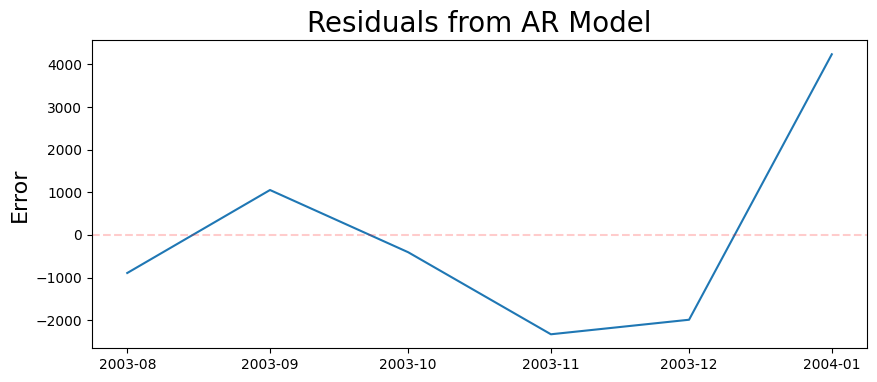

In [ ]:
predictions=model_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data-predictions
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title('Residuals from AR Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)


Text(0, 0.5, 'Sales')

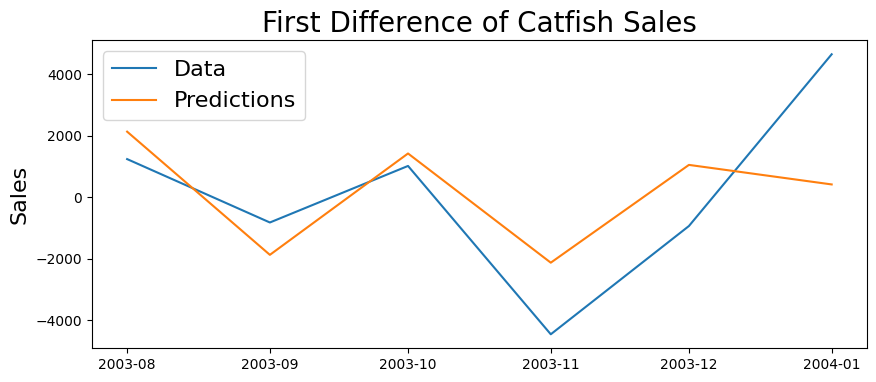

In [121]:
plt.figure(figsize=(10,4))

plt.plot(test_data)
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('First Difference of Catfish Sales', fontsize=20)
plt.ylabel('Sales', fontsize=16)